## AFL 2 Data Mining
- Valencia Melita Christy - 0706022210007
- Vincentia Jennifer - 0706022210004

### Import Library

Import the necessary libraries

In [69]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
import warnings

## Load Dataset
The dataset that we'll use is a Customer Analysis

Load dataset

In [70]:
#Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/refs/heads/main/customer_analysis.csv', delimiter = ",")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [71]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [73]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**From the above output, we can conclude and note that:**

* There are missing values in income
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

First of all, for the missing values, We are simply going to drop the rows that have missing income values.

In [74]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In the next step, We are going to create a feature out of **"Dt_Customer"** that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, We are taking this value relative to the most recent customer in the record.

Thus to get the values We must check the newest and oldest recorded dates.

In [75]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y") # Specify the correct format for day-month-year
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [76]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.  

In [77]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In the next bit, we will be performing the following steps to engineer some new features:

- Extract the "Age" of a customer by using the "Year_Birth" column, which represents the birth year of the respective person, and subtracting it from the current year (2024) to get the customer's age.

- Create another feature "Spent", which sums the total amount spent by the customer in various categories like Wines, Fruits, Meat, Fish, Sweets, and Gold Products to represent their total spending.

- Create another feature "Living_With" based on the "Marital_Status" column to indicate the living situation of the customer. If the marital status indicates being married or together, it will be marked as "Partner", while other statuses like "Single" or "Widow" will be marked as "Alone".

- Create a feature "Children" to indicate the total number of children in the household by summing "Kidhome" (children) and "Teenhome" (teenagers), giving us a total count of children in the household.

- To get further clarity of household, create a feature indicating "Family_Size" by combining the total number of children with the number of adults in the household.

- Create a feature "Is_Parent" to indicate whether the person is a parent. If there are any children in the household (as indicated by the "Children" feature), this feature will be set to 1 (yes), otherwise 0 (no).

- Simplify the "Education" feature into three categories: "Undergraduate", "Graduate", and "Postgraduate" for better clarity in analysis by combining certain categories like "Basic" and "2n Cycle" as "Undergraduate", "Graduation" as "Graduate", and "Master" and "PhD" as "Postgraduate".

- Lastly, we will drop some of the redundant features that are not necessary for further analysis, such as the individual components of spending (e.g., "MntWines", "MntFruits"), customer details like "ID" and "Year_Birth", and unnecessary columns like "NumDealsPurchases" or "Recency" that don't add value after feature engineering.

In [78]:
data['AcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

#Age of customer today
data["Age"] = 2024-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data["Living_With"]=data["Living_With"].replace({"Partner":1, "Alone":0})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature indicating total children living in the household
data["Num_Purchases"]=data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
data["Education"] = data["Education"].map({"Undergraduate": 0, "Graduate": 1, "Postgraduate": 2})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID","Wines","Fruits", "Meat", "Fish", "Sweets", "Gold", "Kidhome", "Teenhome","NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases","NumWebVisitsMonth",
           "Education","Recency", "Complain", "Customer_For", "Living_With","Children"]
data = data.drop(to_drop, axis=1)

<ipython-input-78-630e0d31b625>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Living_With"]=data["Living_With"].replace({"Partner":1, "Alone":0})


In [79]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


In [80]:
data.describe()

,Income,Response,AcceptedCmp,Age,Spent,Num_Purchases,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.150542,0.298373,55.086347,607.268083,14.891501,0.714286
std,21527.278844,0.357683,0.679570,11.701599,602.513364,7.671629,0.451856
min,1730.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000
25%,35233.500000,0.000000,0.000000,47.000000,69.000000,8.000000,0.000000
50%,51371.000000,0.000000,0.000000,54.000000,397.000000,15.000000,1.000000
75%,68487.000000,0.000000,0.000000,65.000000,1048.000000,21.000000,1.000000
max,162397.000000,1.000000,4.000000,84.000000,2525.000000,44.000000,1.000000


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         2212 non-null   float64
 1   Response       2212 non-null   int64  
 2   AcceptedCmp    2212 non-null   int64  
 3   Age            2212 non-null   int64  
 4   Spent          2212 non-null   int64  
 5   Num_Purchases  2212 non-null   int64  
 6   Is_Parent      2212 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 138.2 KB


In [82]:
# float to the object dtypes.
# Get the list of columns with 'object' dtype
object_cols = data.select_dtypes(include=['object']).columns

for i in object_cols:
    # Convert the column to int
    data[i] = data[i].astype(int)

print("All features are now integer")

All features are now integer


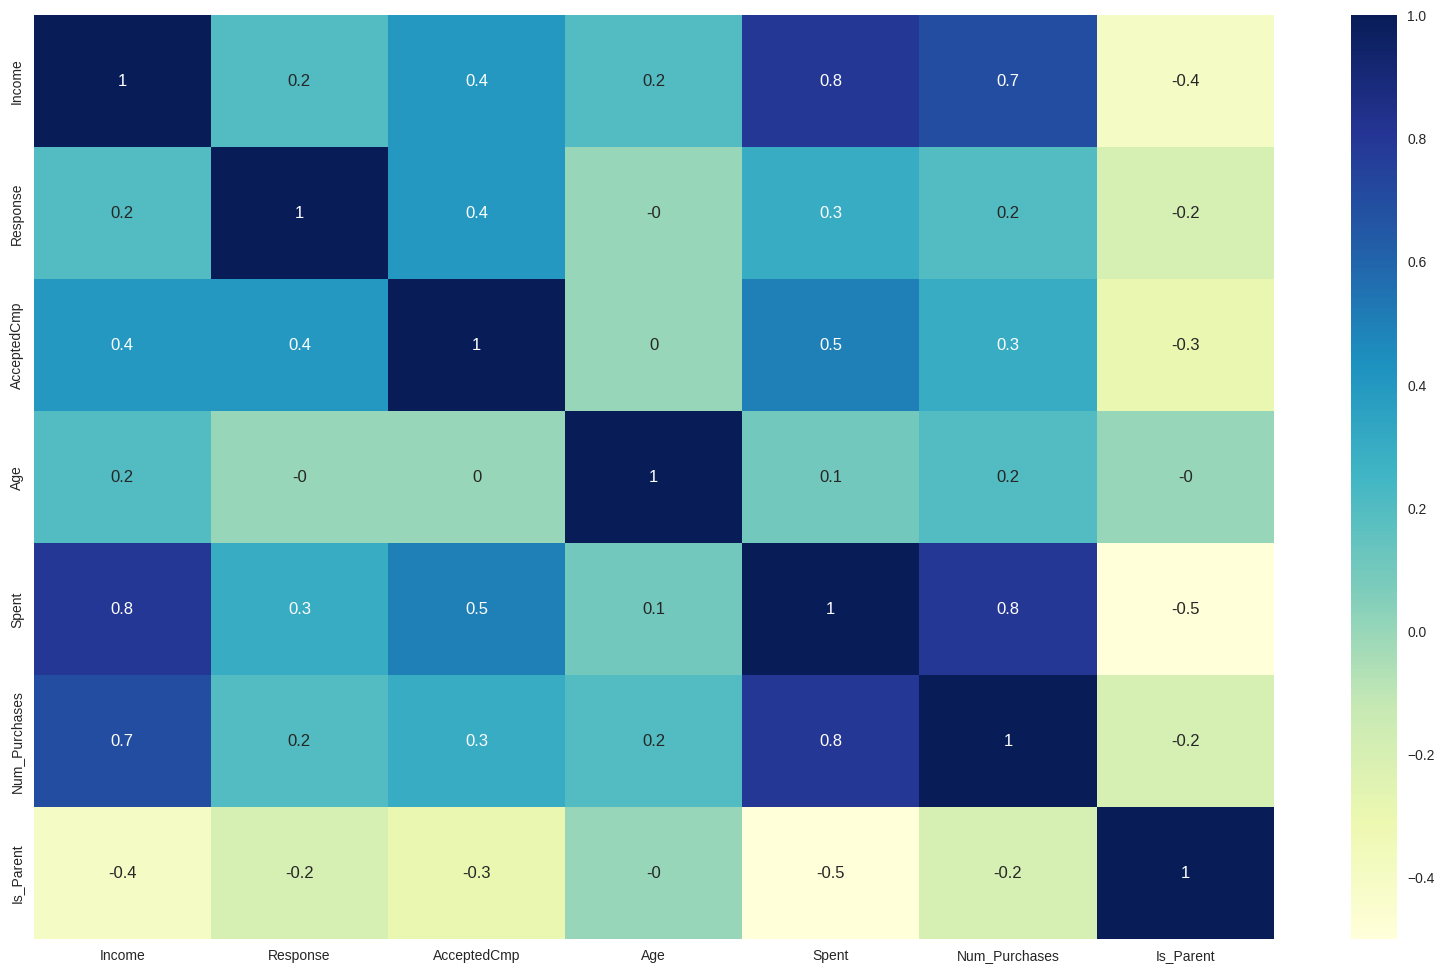

In [83]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr().round(1), cmap="YlGnBu", annot=True)
plt.show()

In [84]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


In [85]:
scaled_ds.head()

,Income,Response,AcceptedCmp,Age,Spent,Num_Purchases,Is_Parent
0,0.351086,1.0,0.0,0.696429,0.639683,0.568182,0.0
1,0.277680,0.0,0.0,0.750000,0.008730,0.136364,1.0
2,0.434956,0.0,0.0,0.553571,0.305952,0.477273,0.0
3,0.155079,0.0,0.0,0.214286,0.019048,0.181818,1.0
4,0.352051,0.0,0.0,0.267857,0.165476,0.431818,1.0


<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.*

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 2.

In [86]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.766720e-17,0.501959,-1.324382,-0.433383,0.241239,0.402050,0.479631
col2,2212.0,1.766720e-17,0.344600,-0.466941,-0.045434,-0.036209,-0.017574,1.044465


<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


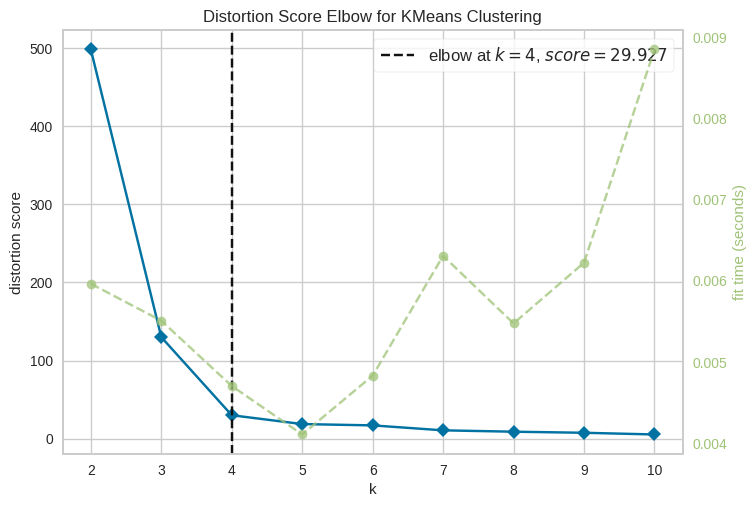

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

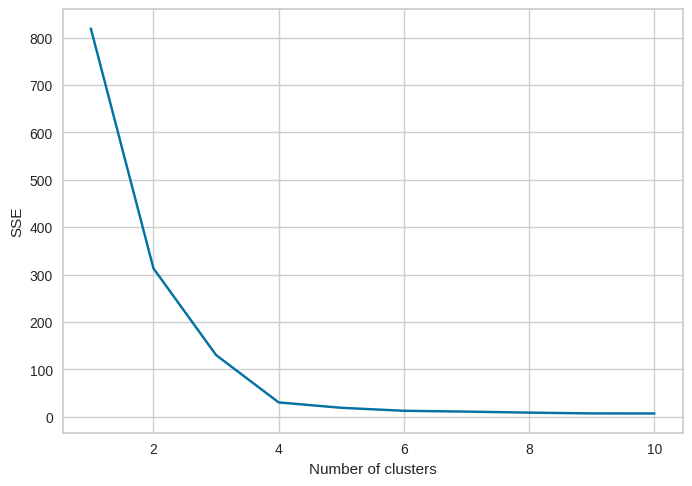

In [88]:
# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',max_iter=300,random_state=42)
    kmeans.fit(PCA_ds)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [89]:
!pip install kneed
from kneed import KneeLocator

In [90]:
# using kneelocator to find the elbow/knee

kneedle = KneeLocator(range(1,11),sse,S=1.0,curve='convex',direction='decreasing')
print("The best k for you model is", kneedle.elbow)

The best k for you model is 4


## K-Means (Non-PCA)

Train the K-Means model on the dataset with the number of clusters you have determined.

In [91]:
kmeans = KMeans(n_clusters=4, init="random", max_iter=500, random_state=42)
y_pred = kmeans.fit_predict(scaled_ds)

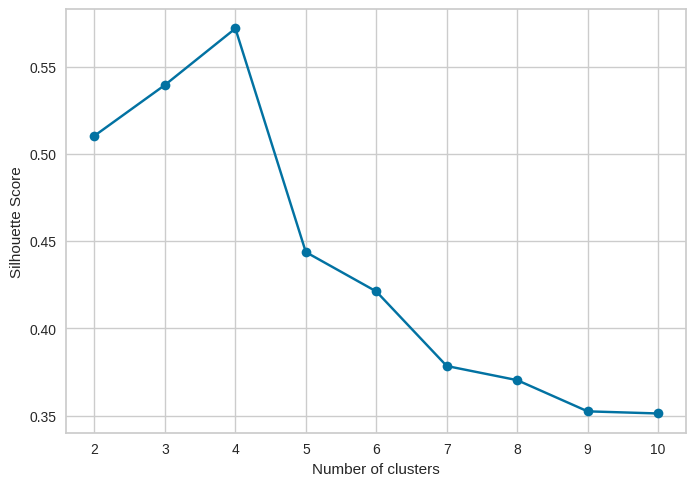

In [101]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(scaled_ds)
    silhouette_scores.append(silhouette_score(scaled_ds, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [102]:
silhouette_avg = silhouette_score(scaled_ds, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5719319608972622


In [103]:
data_kmeans = data.copy()
data_kmeans["Clusters"]= y_pred
data_kmeans.head()

,Income,Response,AcceptedCmp,Age,Spent,Num_Purchases,Is_Parent,Clusters
0,58138.0,1,0,67,1617,25,0,1
1,46344.0,0,0,70,27,6,1,2
2,71613.0,0,0,59,776,21,0,0
3,26646.0,0,0,40,53,8,1,2
4,58293.0,0,0,43,422,19,1,2


In [104]:
cluster_summary = data_kmeans.groupby('Clusters').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Response': [pd.Series.mode],
    'Age': ['mean', 'std', 'min', 'max'],
    'Spent': ['mean', 'std', 'min', 'max'],
    'Is_Parent': [pd.Series.mode],
    'Num_Purchases': ['mean', 'std', 'min', 'max'],
    'AcceptedCmp': [pd.Series.mode],
})

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]
cluster_summary.columns.name = 'KMeans'

pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.max_rows', None)     # Menampilkan semua baris

# Menampilkan hasil
cluster_summary

KMeans                  Cluster 0      Cluster 1      Cluster 2     Cluster 3
Income        mean   62456.631466   74572.702381   46574.692580  45585.503030
              std    24718.476621   17613.172487   17805.875146  18618.661960
              min     1730.000000    7500.000000    2447.000000   7500.000000
              max   160803.000000  105471.000000  162397.000000  94871.000000
Response      mode       0.000000       1.000000       0.000000      1.000000
Age           mean      55.771552      54.017857      54.998587     55.000000
              std       14.502683      14.004479      10.454184     10.375275
              min       28.000000      28.000000      32.000000     35.000000
              max       84.000000      81.000000      78.000000     77.000000
Spent         mean     979.616379    1447.779762     396.120141    515.139394
              std      629.978665     558.058251     438.571424    537.632909
              min        6.000000      35.000000       5.000000     17.000000
              max     2525.000000    2525.000000    2194.000000   2053.000000
Is_Parent     mode       0.000000       0.000000       1.000000      1.000000
Num_Purchases mean      16.747845      19.904762      13.623322     15.442424
              std        6.847853       5.076939       7.811799      7.680631
              min        0.000000       4.000000       0.000000      4.000000
              max       44.000000      30.000000      43.000000     34.000000
AcceptedCmp   mode       0.000000       0.000000       0.000000      0.000000

In [105]:
# count data from each cluster
cluster_counts = data_kmeans['Clusters'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts

,KMeans
Clusters,
0,464
1,168
2,1415
3,165


# K-Means (PCA)


In [106]:
kmeans = KMeans(n_clusters=4, init="random", max_iter=500, random_state=42)
y_pred = kmeans.fit_predict(PCA_ds)

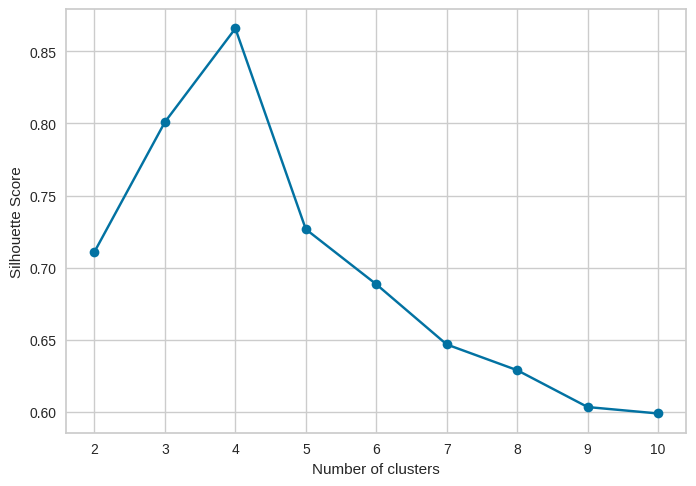

In [107]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(PCA_ds)
    silhouette_scores.append(silhouette_score(PCA_ds, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [108]:
silhouette_avg = silhouette_score(PCA_ds, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8658215426643627


In [109]:
data_kmeans = data.copy()
data_kmeans["Clusters"]= y_pred
data_kmeans.head()

,Income,Response,AcceptedCmp,Age,Spent,Num_Purchases,Is_Parent,Clusters
0,58138.0,1,0,67,1617,25,0,1
1,46344.0,0,0,70,27,6,1,2
2,71613.0,0,0,59,776,21,0,0
3,26646.0,0,0,40,53,8,1,2
4,58293.0,0,0,43,422,19,1,2


In [110]:
cluster_summary = data_kmeans.groupby('Clusters').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Response': [pd.Series.mode],
    'Age': ['mean', 'std', 'min', 'max'],
    'Spent': ['mean', 'std', 'min', 'max'],
    'Is_Parent': [pd.Series.mode],
    'Num_Purchases': ['mean', 'std', 'min', 'max'],
    'AcceptedCmp': [pd.Series.mode],
})

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]
cluster_summary.columns.name = 'KMeans'

pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.max_rows', None)     # Menampilkan semua baris

# Menampilkan hasil
cluster_summary

KMeans                  Cluster 0      Cluster 1      Cluster 2     Cluster 3
Income        mean   62456.631466   74572.702381   46574.692580  45585.503030
              std    24718.476621   17613.172487   17805.875146  18618.661960
              min     1730.000000    7500.000000    2447.000000   7500.000000
              max   160803.000000  105471.000000  162397.000000  94871.000000
Response      mode       0.000000       1.000000       0.000000      1.000000
Age           mean      55.771552      54.017857      54.998587     55.000000
              std       14.502683      14.004479      10.454184     10.375275
              min       28.000000      28.000000      32.000000     35.000000
              max       84.000000      81.000000      78.000000     77.000000
Spent         mean     979.616379    1447.779762     396.120141    515.139394
              std      629.978665     558.058251     438.571424    537.632909
              min        6.000000      35.000000       5.000000     17.000000
              max     2525.000000    2525.000000    2194.000000   2053.000000
Is_Parent     mode       0.000000       0.000000       1.000000      1.000000
Num_Purchases mean      16.747845      19.904762      13.623322     15.442424
              std        6.847853       5.076939       7.811799      7.680631
              min        0.000000       4.000000       0.000000      4.000000
              max       44.000000      30.000000      43.000000     34.000000
AcceptedCmp   mode       0.000000       0.000000       0.000000      0.000000

In [111]:
# count data from each cluster
cluster_counts = data_kmeans['Clusters'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts

,KMeans
Clusters,
0,464
1,168
2,1415
3,165


# Agglomerative Clustering (Non-PCA)

In [112]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_ds)
#Adding the Clusters feature to the orignal dataframe.
data_agglo = data.copy()
data_agglo["Clusters"]= yhat_AC

silhouette_avg = silhouette_score(scaled_ds, yhat_AC)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5708881518138464


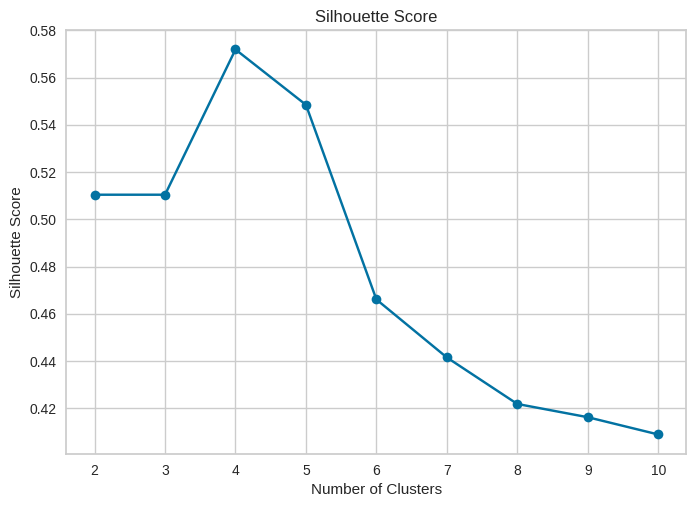

In [121]:
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(scaled_ds, method='single'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(scaled_ds, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


In [113]:
# Lakukan agregasi pada data customer yang telah diproses (data)

cluster_summary = data_agglo.groupby('Clusters').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Response': [pd.Series.mode],
    'Age': ['mean', 'std', 'min', 'max'],
    'Spent': ['mean', 'std', 'min', 'max'],
    'Is_Parent': [pd.Series.mode],
    'Num_Purchases': ['mean', 'std', 'min', 'max'],
    'AcceptedCmp': [pd.Series.mode],
})

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]

# Menambahkan nama 'KMeans' pada level pertama kolom
cluster_summary.columns.name = 'Clusters'

# Menampilkan hasil
cluster_summary

Clusters                Cluster 0      Cluster 1      Cluster 2     Cluster 3
Income        mean   46728.326041   74572.702381   62054.175325  45585.503030
              std    18256.934135   17613.172487   23999.694287  18618.661960
              min     2447.000000    7500.000000    1730.000000   7500.000000
              max   162397.000000  105471.000000  160803.000000  94871.000000
Response      mode       0.000000       1.000000       0.000000      1.000000
Age           mean      55.008469      54.017857      55.744589     55.000000
              std       10.461521      14.004479      14.503037     10.375275
              min       32.000000      28.000000      28.000000     35.000000
              max       78.000000      81.000000      84.000000     77.000000
Spent         mean     395.570924    1447.779762     983.826840    515.139394
              std      438.505167     558.058251     628.070930    537.632909
              min        5.000000      35.000000       6.000000     17.000000
              max     2194.000000    2525.000000    2525.000000   2053.000000
Is_Parent     mode       1.000000       0.000000       0.000000      1.000000
Num_Purchases mean      13.604093      19.904762      16.820346     15.442424
              std        7.823029       5.076939       6.773063      7.680631
              min        0.000000       4.000000       0.000000      4.000000
              max       43.000000      30.000000      44.000000     34.000000
AcceptedCmp   mode       0.000000       0.000000       0.000000      0.000000

In [114]:
cluster_counts = data_agglo['Clusters'].value_counts().sort_index()
cluster_counts.name = 'Clusters Agglo'
cluster_counts

,Clusters Agglo
Clusters,
0,1417
1,168
2,462
3,165


# Agglomerative Clustering (PCA)

In [115]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data_agglo = data.copy()
data_agglo["Clusters"]= yhat_AC

silhouette_avg = silhouette_score(PCA_ds, yhat_AC)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9091639467549404


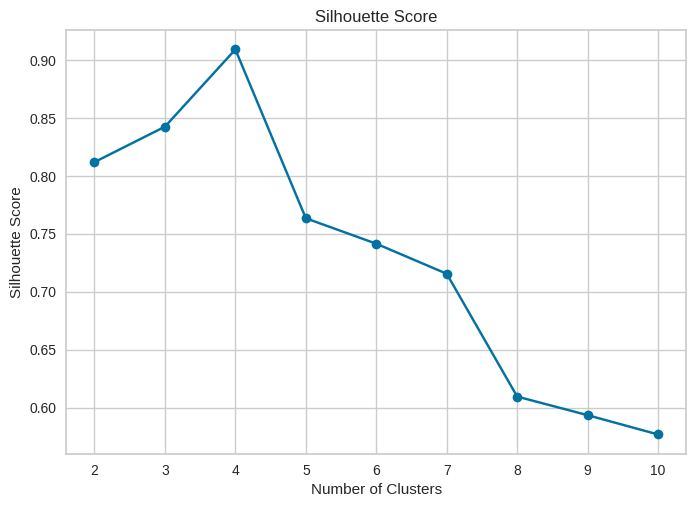

In [116]:
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(PCA_ds, method='single'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(PCA_ds, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [118]:
# Menampilkan informasi agregasi varians
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()  # Varians kumulatif

# Membuat DataFrame untuk melihat varians per komponen
variance_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': cumulative_variance
})

variance_df

,Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.493894,0.493894
1,PC2,0.232771,0.726665


In [119]:
# Misalkan 'pca' adalah objek PCA yang sudah difit
components_df = pd.DataFrame(pca.components_, columns=scaled_ds.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Menampilkan kontribusi masing-masing fitur pada PC1 dan PC2
print("Kontribusi fitur pada PC1:")
print(components_df.loc['PC1'])

print("\nKontribusi fitur pada PC2:")
print(components_df.loc['PC2'])


Kontribusi fitur pada PC1:
Income          -0.151278
Response        -0.338044
AcceptedCmp     -0.158589
Age             -0.020164
Spent           -0.340359
Num_Purchases   -0.145969
Is_Parent        0.836739
Name: PC1, dtype: float64

Kontribusi fitur pada PC2:
Income          -0.006114
Response         0.896315
AcceptedCmp      0.168681
Age             -0.020244
Spent            0.021189
Num_Purchases    0.036036
Is_Parent        0.407396
Name: PC2, dtype: float64


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [122]:
# Lakukan agregasi pada data customer yang telah diproses (data)

cluster_summary = data_agglo.groupby('Clusters').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Response': [pd.Series.mode],
    'Age': ['mean', 'std', 'min', 'max'],
    'Spent': ['mean', 'std', 'min', 'max'],
    'Is_Parent': [pd.Series.mode],
    'Num_Purchases': ['mean', 'std', 'min', 'max'],
    'AcceptedCmp': [pd.Series.mode],
})

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]

# Menambahkan nama 'KMeans' pada level pertama kolom
cluster_summary.columns.name = 'Clusters'

# Menampilkan hasil
cluster_summary

Clusters                Cluster 0     Cluster 1      Cluster 2      Cluster 3
Income        mean   46574.692580  45585.503030   62456.631466   74572.702381
              std    17805.875146  18618.661960   24718.476621   17613.172487
              min     2447.000000   7500.000000    1730.000000    7500.000000
              max   162397.000000  94871.000000  160803.000000  105471.000000
Response      mode       0.000000      1.000000       0.000000       1.000000
Age           mean      54.998587     55.000000      55.771552      54.017857
              std       10.454184     10.375275      14.502683      14.004479
              min       32.000000     35.000000      28.000000      28.000000
              max       78.000000     77.000000      84.000000      81.000000
Spent         mean     396.120141    515.139394     979.616379    1447.779762
              std      438.571424    537.632909     629.978665     558.058251
              min        5.000000     17.000000       6.000000      35.000000
              max     2194.000000   2053.000000    2525.000000    2525.000000
Is_Parent     mode       1.000000      1.000000       0.000000       0.000000
Num_Purchases mean      13.623322     15.442424      16.747845      19.904762
              std        7.811799      7.680631       6.847853       5.076939
              min        0.000000      4.000000       0.000000       4.000000
              max       43.000000     34.000000      44.000000      30.000000
AcceptedCmp   mode       0.000000      0.000000       0.000000       0.000000

In [123]:
cluster_counts = data_agglo['Clusters'].value_counts().sort_index()
cluster_counts.name = 'Clusters Agglo'
cluster_counts

,Clusters Agglo
Clusters,
0,1415
1,165
2,464
3,168


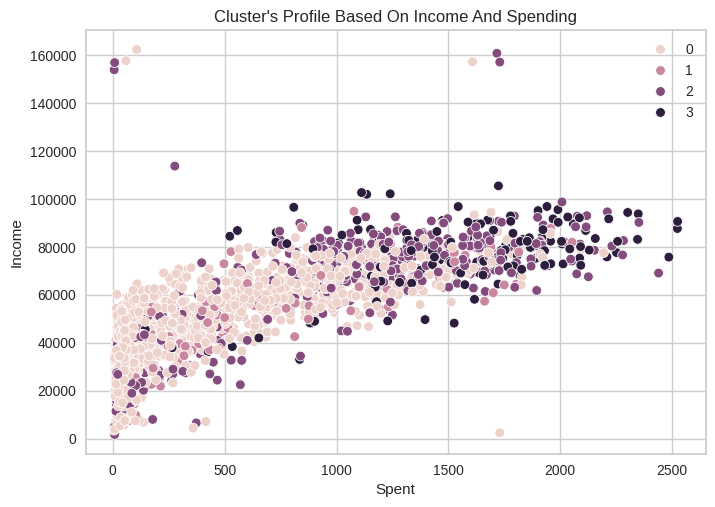

In [124]:
pl = sns.scatterplot(data = data_agglo,x=data_agglo["Spent"], y=data_agglo["Income"],hue=data_agglo["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [125]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=500, random_state=42)
kmeans.fit(PCA_ds)
y_pred = kmeans.predict(PCA_ds)
silhouette_avg = silhouette_score(PCA_ds, y_pred)
print(f"the silhouette score is {silhouette_avg}")

the silhouette score is 0.9091639467549404


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

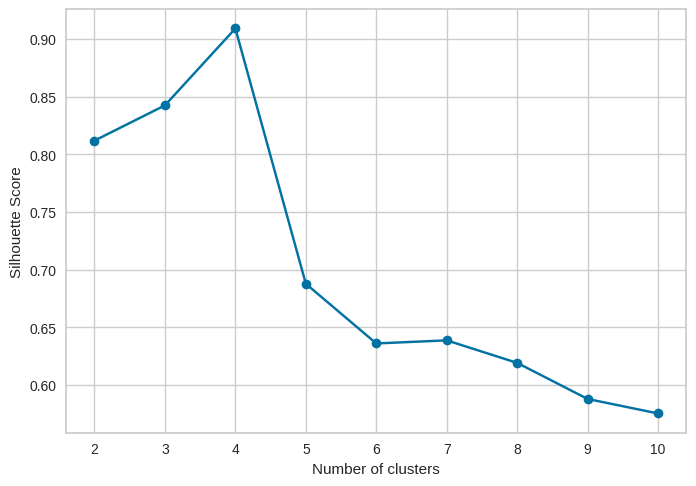

In [126]:
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(PCA_ds, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(PCA_ds, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [127]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(PCA_ds)

In [128]:
PCA_ds["Agglo"] = y_hc
#Adding the Clusters feature to the orignal dataframe.
data_agglo = data.copy()
data_agglo["Agglo"]= y_hc

silhouette_avg = silhouette_score(PCA_ds, y_hc)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.94308017801439


Display the cluster summary in the form of a dataframe.

In [129]:
# Lakukan agregasi
cluster_summary = data_agglo.groupby('Agglo').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Response': [pd.Series.mode],
    'Age': ['mean', 'std', 'min', 'max'],
    'Spent': ['mean', 'std', 'min', 'max'],
    'Is_Parent': [pd.Series.mode],
    'Num_Purchases': ['mean', 'std', 'min', 'max'],
    'AcceptedCmp': [pd.Series.mode],
})

# Menampilkan hasil
cluster_summary

Income                                 Response        Age  \
               mean           std     min       max     mode       mean   
Agglo                                                                     
0      46574.692580  17805.875146  2447.0  162397.0        0  54.998587   
1      62456.631466  24718.476621  1730.0  160803.0        0  55.771552   
2      45585.503030  18618.661960  7500.0   94871.0        1  55.000000   
3      74572.702381  17613.172487  7500.0  105471.0        1  54.017857   

                                Spent                       Is_Parent  \
             std min max         mean         std min   max      mode   
Agglo                                                                   
0      10.454184  32  78   396.120141  438.571424   5  2194         1   
1      14.502683  28  84   979.616379  629.978665   6  2525         0   
2      10.375275  35  77   515.139394  537.632909  17  2053         1   
3      14.004479  28  81  1447.779762  558.058251  35  2525         0   

      Num_Purchases                   AcceptedCmp  
               mean       std min max        mode  
Agglo                                              
0         13.623322  7.811799   0  43           0  
1         16.747845  6.847853   0  44           0  
2         15.442424  7.680631   4  34           0  
3         19.904762  5.076939   4  30           0

In [130]:
# Menghitung jumlah data di setiap klaster
cluster_counts = PCA_ds['Agglo'].value_counts().sort_index()
cluster_counts.name = 'Agglo'
cluster_counts

,Agglo
Agglo,
0,1415
1,464
2,165
3,168


**Hierarchical Visualization**

Single Linkage

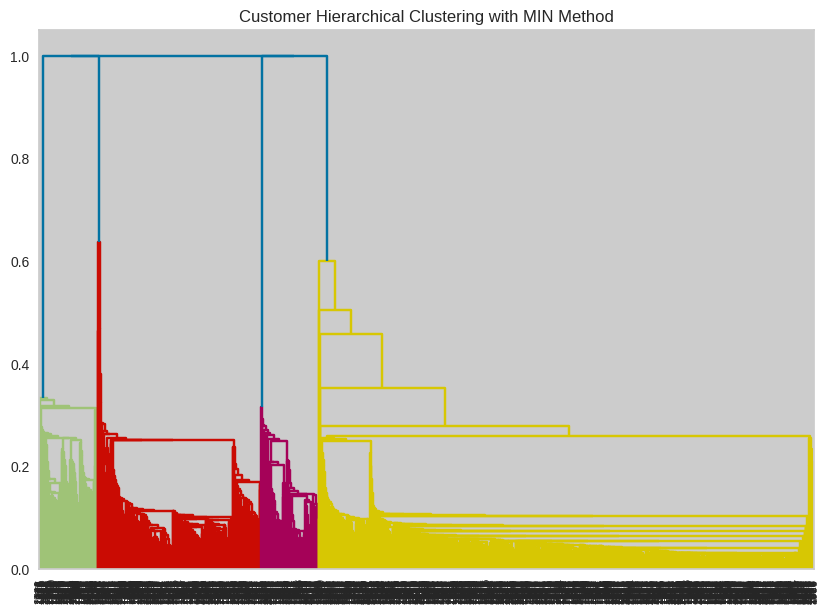

In [131]:
Z = linkage(scaled_ds, method='single', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Customer Hierarchical Clustering with MIN Method')
plt.show()


complete linkage

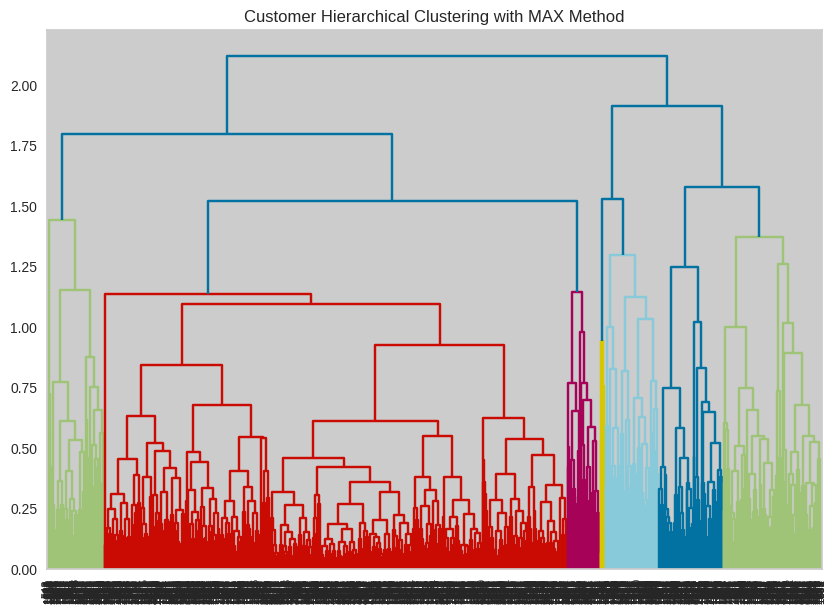

In [132]:
# Complete Linkage with MAX Method
Z = linkage(scaled_ds, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Customer Hierarchical Clustering with MAX Method')
plt.show()

average linkage

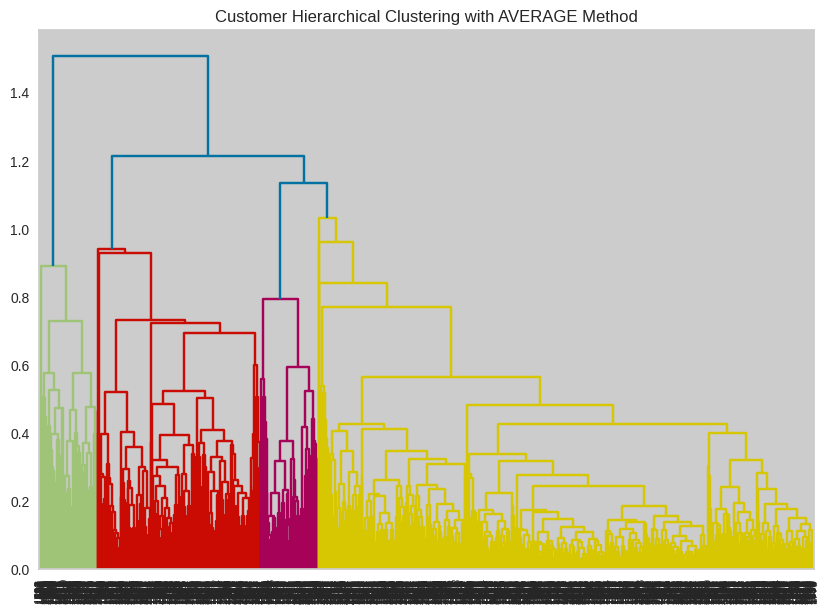

In [133]:
Z = linkage(scaled_ds, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Customer Hierarchical Clustering with AVERAGE Method')
plt.show()

ward method

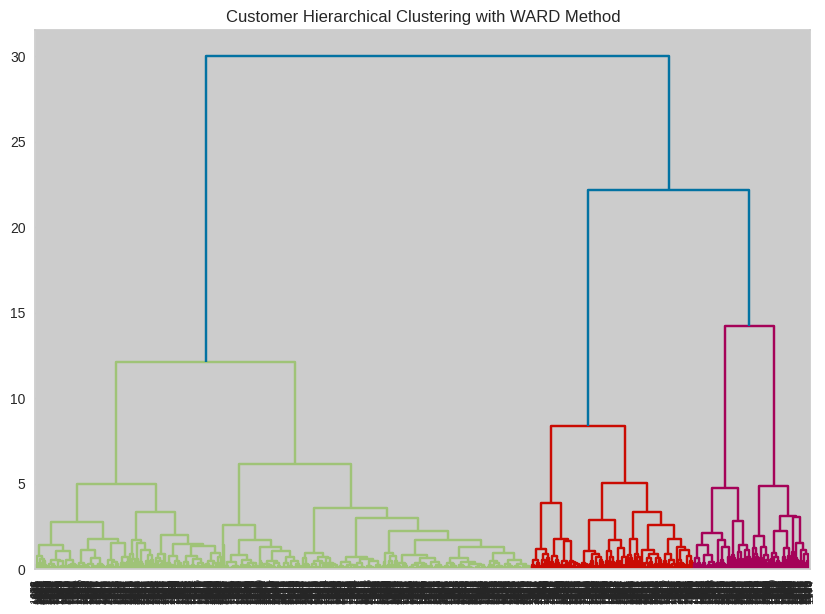

In [134]:
Z = linkage(scaled_ds, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Customer Hierarchical Clustering with WARD Method')
plt.show()

In [135]:
data = {
    "Clustering Method": ["K-Means non PCA", "K-Means PCA", "Agglo non PCA", "Agglo PCA"],
    "Silhouette Score": [0.5719319608972622, 0.8658215426643627, 0.5708881518138464, 0.9091639467549404]
}

# Create a DataFrame
df_scores = pd.DataFrame(data)

# Display the table
print(df_scores)

  Clustering Method  Silhouette Score
0   K-Means non PCA          0.571932
1       K-Means PCA          0.865822
2     Agglo non PCA          0.570888
3         Agglo PCA          0.909164


In [137]:
linkage_methods = ['ward', 'single', 'complete', 'average']
silhouette_scores = {}

for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=3, linkage=method)
    hc_labels = hc.fit_predict(scaled_ds)
    hc_silhouette = silhouette_score(scaled_ds, hc_labels)
    silhouette_scores[method] = hc_silhouette
    print(f"Silhouette Score Hierarchical Clustering ({method}): {hc_silhouette}")

Silhouette Score Hierarchical Clustering (ward): 0.5384227333241856
Silhouette Score Hierarchical Clustering (single): 0.5201293407473817
Silhouette Score Hierarchical Clustering (complete): 0.5138611724895662
Silhouette Score Hierarchical Clustering (average): 0.5138611724895662
